In [30]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

np.random.seed(0)

In [31]:
# Unpack the iris dataset, from UCI Machine Learning Repository
iris = datasets.load_iris()
X = iris["data"]
y = iris["target"]
# Preprocess data
X = StandardScaler().fit_transform(X)
# Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

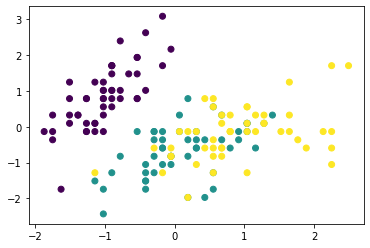

In [32]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [34]:
def most_common(lst):
    """Returns the most common element in a list"""
    return max(set(lst), key=lst.count)

In [35]:
def euclidean(point, data):
    """Euclidean distance between a point  & data"""
    return np.sqrt(np.sum((point - data) ** 2, axis=1))

In [36]:
class KNeighborsClassifier:
    def __init__(self, k=5, dist_metric=euclidean):
        self.k = k
        self.dist_metric = dist_metric

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        neighbors = []
        for x in X_test:
            distances = self.dist_metric(x, self.X_train)
            y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
            neighbors.append(y_sorted[: self.k])
        return list(map(most_common, neighbors))

    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = sum(y_pred == y_test) / len(y_test)
        return accuracy

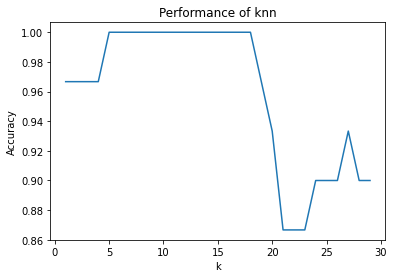

In [37]:
accuracies = []
ks = range(1, 30)
for k in ks:
    knn = KNeighborsClassifier(k=k)
    knn.fit(X_train, y_train)
    accuracy = knn.evaluate(X_test, y_test)
    accuracies.append(accuracy)
fig, ax = plt.subplots()
ax.plot(ks, accuracies)
ax.set(xlabel="k", ylabel="Accuracy", title="Performance of knn")
plt.show()